## Deep Learning

In [93]:
# libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from datetime import datetime
import matplotlib.pyplot as plt

# read the data
data = pd.read_csv('NYC Accidents 2020.csv')
data.head()



,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


###  Preprocess the data

In [94]:
columns_of_interest = ["CRASH TIME", "ZIP CODE", "LATITUDE", "LONGITUDE", "COLLISION_ID", "BOROUGH"]
data = data[columns_of_interest]
data = data.dropna()

data['CRASH TIME'] = [datetime.strptime(x, '%H:%M:%S') for x in data['CRASH TIME']]
data['CRASH TIME'] = [x.hour * 3600 + x.minute * 60 + x.second for x in data['CRASH TIME']]

data.head()



,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,COLLISION_ID,BOROUGH
0,56400,10466.0,40.892100,-73.833760,4342908,BRONX
1,75600,11221.0,40.690500,-73.919914,4343555,BROOKLYN
3,0,10459.0,40.824720,-73.892960,4343588,BRONX
4,61800,11203.0,40.649890,-73.933890,4342953,BROOKLYN
6,70200,10459.0,40.825226,-73.887780,4343004,BRONX


## feedforward neural network

In [95]:
# Split the data into training and testing sets
X = data.drop(columns=['BOROUGH'])
y = data['BOROUGH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.nunique(), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, pd.get_dummies(y_train), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, pd.get_dummies(y_test))
print('Test accuracy:', accuracy)

Epoch 1/10
1194/1194 [==============================] - 8s 6ms/step - loss: 149558.0469 - accuracy: 0.2594
Epoch 2/10
1194/1194 [==============================] - 3s 2ms/step - loss: 123.6173 - accuracy: 0.2685
Epoch 3/10
1194/1194 [==============================] - 3s 3ms/step - loss: 48.9484 - accuracy: 0.2743
Epoch 4/10
1194/1194 [==============================] - 4s 3ms/step - loss: 8.8945 - accuracy: 0.2812
Epoch 5/10
1194/1194 [==============================] - 2s 2ms/step - loss: 1.8583 - accuracy: 0.3005
Epoch 6/10
1194/1194 [==============================] - 2s 2ms/step - loss: 1.5215 - accuracy: 0.3301
Epoch 7/10
1194/1194 [==============================] - 3s 2ms/step - loss: 1.4447 - accuracy: 0.3439
Epoch 8/10
1194/1194 [==============================] - 2s 2ms/step - loss: 1.4310 - accuracy: 0.3465
Epoch 9/10
1194/1194 [==============================] - 2s 2ms/step - loss: 1.4279 - accuracy: 0.3472
Epoch 10/10
299/299 [==============================] - 1s 2ms/step - loss:

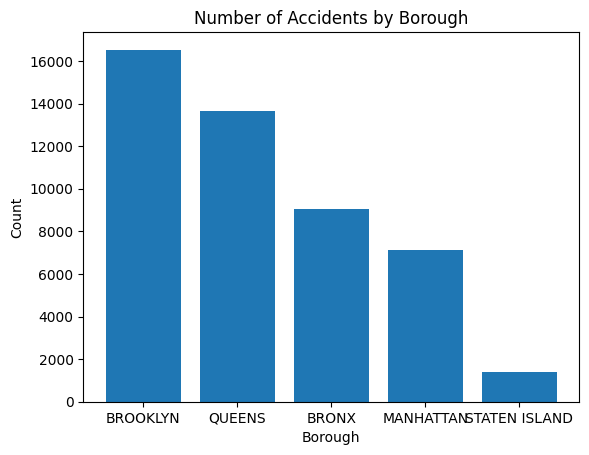

In [100]:
# Create a bar chart of the count of accidents in each borough
borough_counts = data['BOROUGH'].value_counts()
plt.bar(borough_counts.index, borough_counts.values)
plt.title('Number of Accidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()